In [1]:
from tensorflow.keras.models import load_model

# Muat model dari file

model = load_model('model2_he.h5')

In [2]:
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      zoom_range = 0.2,
      shear_range = 0.2,
      rotation_range = 20,
      horizontal_flip = True
      )

TRAINING_DIR = "../dataset-FER2013/dataset/histogram_equalization/training/"

TESTING_DIR = "../dataset-FER2013/dataset/histogram_equalization/testing//"
testing_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64, 64),
	class_mode='categorical',
    color_mode='grayscale'
)

test_generator = testing_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(64, 64),
	class_mode='categorical',
    color_mode='grayscale'
)

Found 19106 images belonging to 7 classes.
Found 4762 images belonging to 7 classes.


In [3]:
model.evaluate(test_generator)

149/149 [==============================] - 16s 40ms/step - loss: 1.0022 - accuracy: 0.6560


[1.0021675825119019, 0.6560268998146057]

1/1 [==============================] - 0s 24ms/step


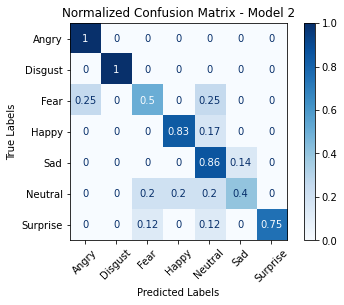

0.7232893157262905


In [36]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score


# Get the predictions for the test data
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to categorical labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
# print("Confusion Matrix:")
# print(cm)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a blue color map
cmap = plt.cm.Blues

# Plot the normalized confusion matrix
# fig, ax = plt.subplots(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=normalized_cm, display_labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])
cm_display.plot(cmap=cmap)

# Set additional properties for better visualization
plt.xticks(np.arange(7), ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'], rotation=45)
plt.yticks(np.arange(7), ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Neutral', 'Surprise'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix - Model 2')

plt.show()

# Calculate the F1 score
f1_scores = classification_report(true_labels, predicted_labels)
print("F1 Score:")
print(f1_scores)
# print(f1_score(true_labels, predicted_labels, average='macro'))


In [4]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [17]:
import numpy as np

# Get the predictions for the test data
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to categorical labels
true_labels = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 31ms/step


In [18]:
import pandas as pd

df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = predictions.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

conf_matr = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat = conf_matr,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(6, 6))
fig.show()

# Calculate the F1 score
f1_scores = classification_report(true_labels, predicted_labels)
print("F1 Score:")
print(f1_scores)


AssertionError: len(class_names) should be equal to number ofclasses in the dataset

1/1 [==============================] - 0s 32ms/step


Confusion Matrix:
[[ 1  0  0  1  1  1]
 [ 0  3  0  0  1  0]
 [ 0  0 12  0  0  1]
 [ 0  0  2  1  1  0]
 [ 0  0  1  1  2  0]
 [ 0  0  0  1  0  2]]


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (7).

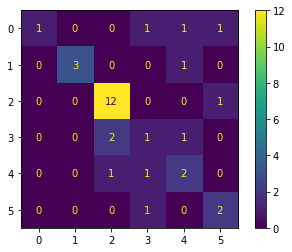

In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the predictions for the test data
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to categorical labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

cm_display.plot()
plt.show()

# Calculate the F1 score
f1_scores = classification_report(true_labels, predicted_labels)
print("F1 Score:")
print(f1_scores)

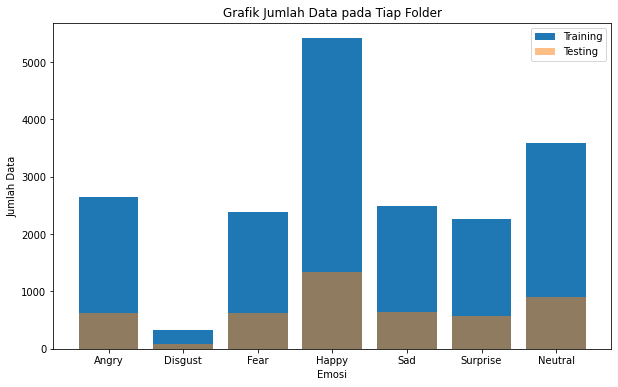

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Get predictions for all test data
all_test_images, all_test_labels = [], []
for batch in test_generator:
    test_images, test_labels = batch
    all_test_images.append(test_images)
    all_test_labels.append(test_labels)
all_test_images = np.concatenate(all_test_images)
all_test_labels = np.concatenate(all_test_labels)

# Predict labels for all test data
predictions = model.predict(all_test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(all_test_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate classification report
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
classification_rep = classification_report(true_labels, predicted_labels, target_names=target_names)

# Print classification report
print("Classification Report:")
print(classification_rep)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
cm_display.plot(ax=ax, cmap='Blues')

# Set additional properties for better visualization
plt.xticks(rotation=45)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [15]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

1/1 [==============================] - 0s 37ms/step


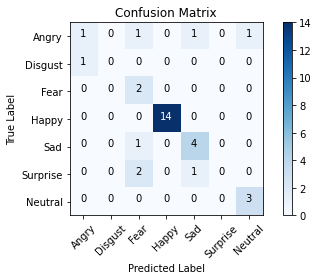

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

# Get the predictions for the test data
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to categorical labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define the class labels
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Plot the confusion matrix
plot_confusion_matrix(cm, class_labels)
plt.show()


In [5]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [108]:
test_images, test_labels = next(test_generator)
y_pred_ = model.predict(test_images/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(test_labels, axis=1)

1/1 [==============================] - 0s 20ms/step


In [8]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

NameError: name 'classes' is not defined

In [ ]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

In [ ]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

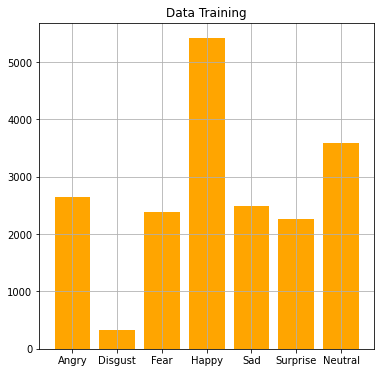

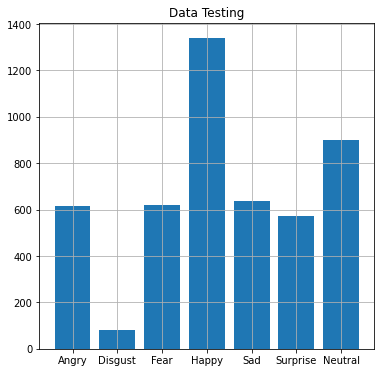

In [15]:
import os
import matplotlib.pyplot as plt

# Path ke folder training
training_folder = '../dataset-FER2013/dataset/detecting/detectable-face/training/'

# Path ke folder testing
testing_folder = '../dataset-FER2013/dataset/detecting/detectable-face/testing/'

# Fungsi untuk menghitung jumlah file dalam folder
def count_files_in_folder(folder):
    count = 0
    for _, _, files in os.walk(folder):
        count += len(files)
    return count

# List nama folder
folders = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# List jumlah data training
training_counts = []
for folder in folders:
    folder_path = os.path.join(training_folder, folder)
    count = count_files_in_folder(folder_path)
    training_counts.append(count)

# List jumlah data testing
testing_counts = []
for folder in folders:
    folder_path = os.path.join(testing_folder, folder)
    count = count_files_in_folder(folder_path)
    testing_counts.append(count)

# Membuat grafik untuk data training
plt.figure(figsize=(6, 6))
plt.bar(folders, training_counts, color='orange')
# plt.xlabel('Emosi')
# plt.ylabel('Jumlah Data')
plt.title('Data Training')
plt.grid(True)
plt.show()

# Membuat grafik untuk data testing
plt.figure(figsize=(6, 6))
plt.bar(folders, testing_counts)
# plt.xlabel('Emosi')
# plt.ylabel('Jumlah Data')
plt.title('Data Testing')
plt.grid(True)
plt.show()
